In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd ./drive/My \Drive/PCD

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/PCD


In [2]:
#Load Everything and ensure that during changes items are reloaded
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#import fastai.. cheat and load everything!
import fastai
from fastai import *
#import fastai more specific
from fastai.vision import *
from fastai.metrics import *
import re
import scipy.ndimage
import gc
import gradcam
from gradcam import *
fastai.__version__

'1.0.54'

In [3]:
#path to the data
path = Path('output'); path.ls()

[PosixPath('output/valid'),
 PosixPath('output/models'),
 PosixPath('output/train')]

In [4]:
data=None
gc.collect()

# We are using batchsize of 8
bs = 8
# This is what we want to flip and move around; we want to do just basic stuff at first
tfms = get_transforms()
# pulls and formats the data by looking for the
# path= where it is stored
# ds_tfms= the transforms we want of the images
# size= how big the images should be
# bs= batchsize that we can fit with the GPU Ram; Mine is 64 for 8gb
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, bs=bs)
data.normalize(imagenet_stats)
# lists out the classes
data.classes

['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Cu', 'Ns', 'Sc', 'St']

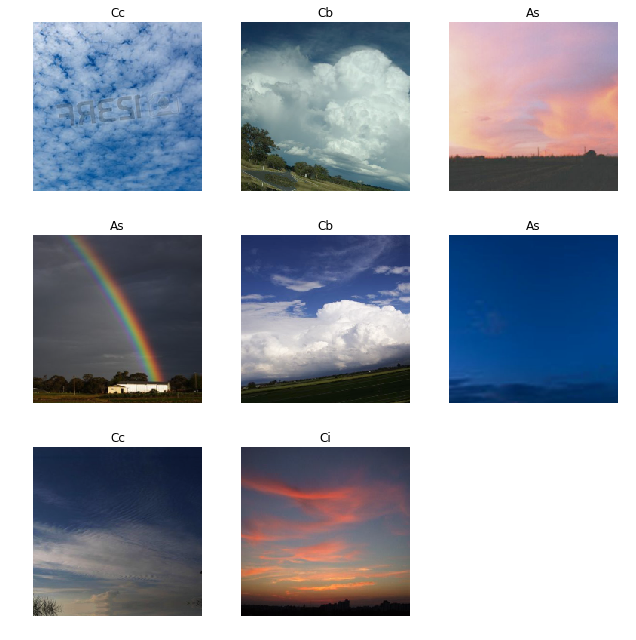

In [5]:
data.show_batch(rows=4, figsize=(9,9))

In [6]:
def reset_learner(data,is_fp16=False):
    learn=None
    gc.collect()
    learn = cnn_learner(data, models.densenet201, metrics=accuracy, callback_fns=ShowGraph)
    if is_fp16:
        learn = learn.to_fp16()
    return learn
# learn will be a convultional neural network (cnn) that takes in several items
# data = our images that have been setup
# architecture = is the model we are choosing. In this case Resnet34
# metrics = is how we are going to gauge success
learn = reset_learner(data)
learn.load('stage-2-d201')

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/checkpoints/densenet201-c1103571.pth
100%|██████████| 81131730/81131730 [00:02<00:00, 28706733.44it/s]


Learner(data=ImageDataBunch;

Train: LabelList (2344 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
As,As,As,As,As
Path: output;

Valid: LabelList (473 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sc,Sc,Sc,Sc,Sc
Path: output;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace)
          (conv

In [7]:
# This gathers the data together for the comparing top losses and confusion Matrix
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

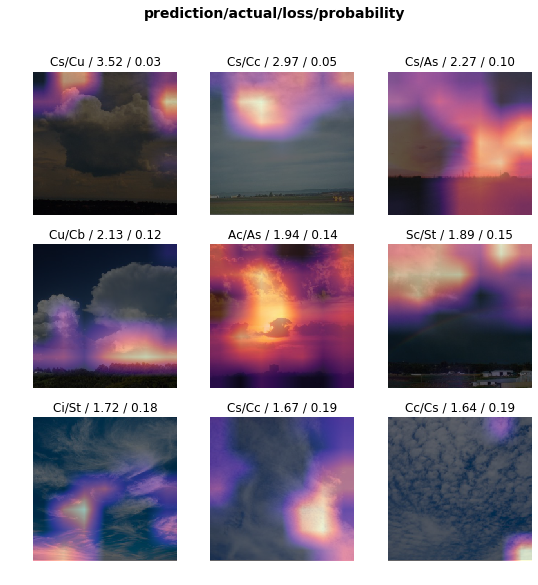

In [8]:
#Lists the top categories
interp.plot_top_losses(9, figsize=(9,9))

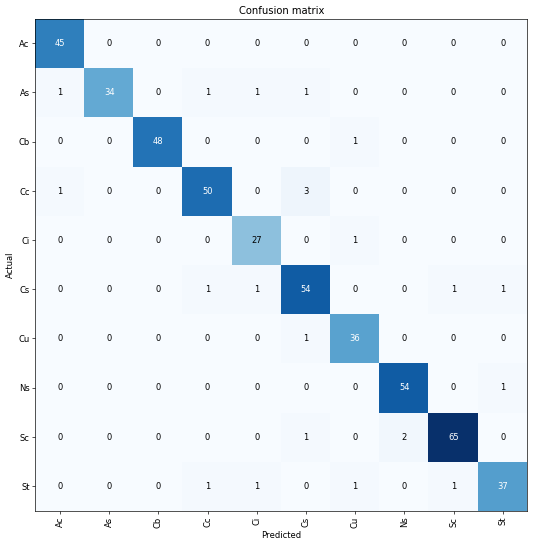

In [9]:
#shows where things went wrong in a confusion matrix
interp.plot_confusion_matrix(figsize=(9,9), dpi=60)

In [10]:
#most confused
interp.most_confused(min_val=2)

[('Cc', 'Cs', 3), ('Sc', 'Ns', 2)]

cam

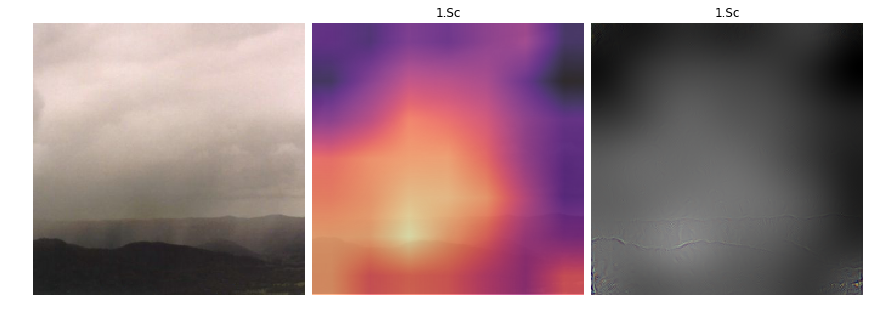

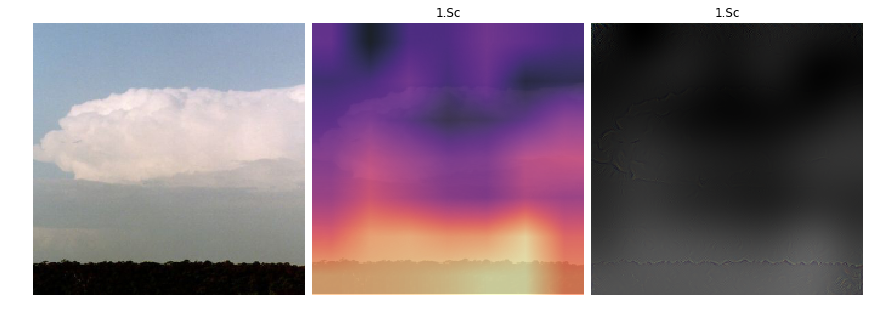

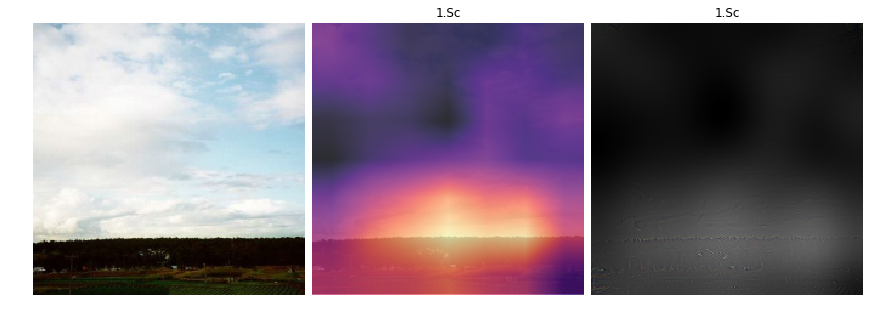

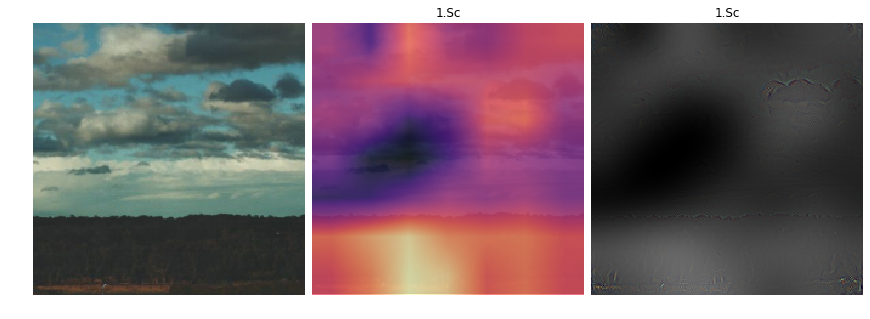

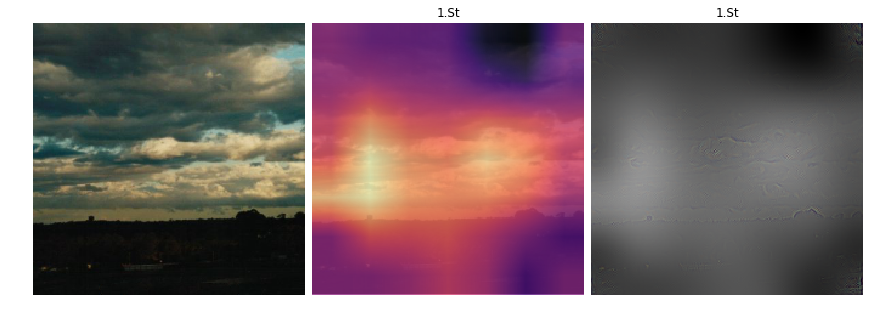

In [11]:
for idx in range(0,100,20):
    gcam = GradCam.from_interp(learn,interp,idx,include_label=True)
    gcam.plot()

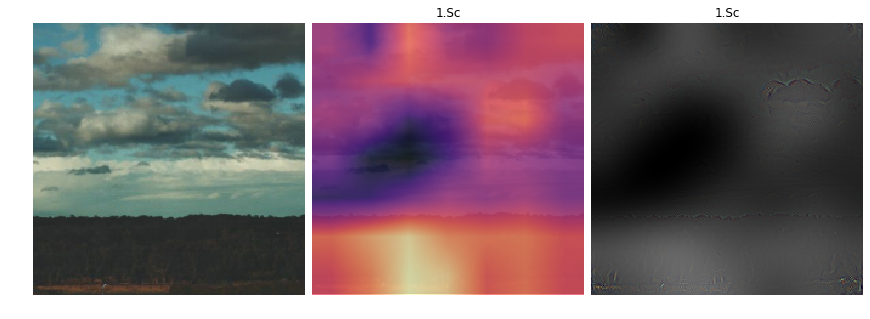

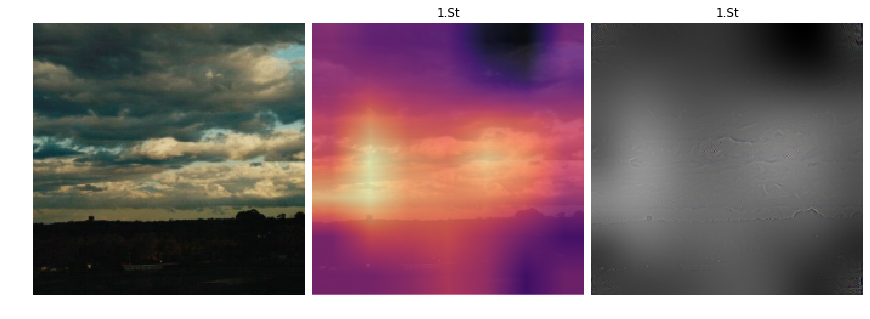

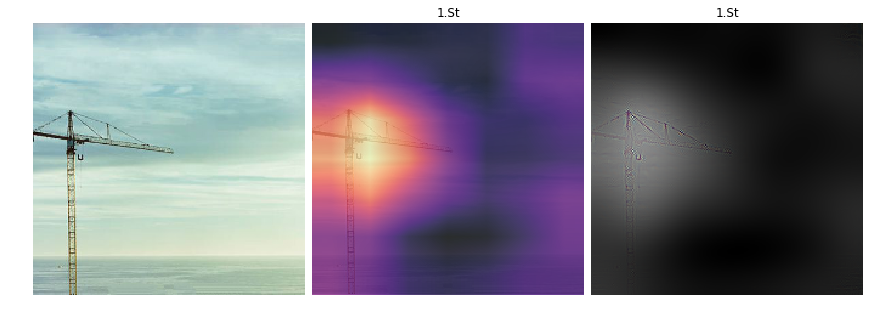

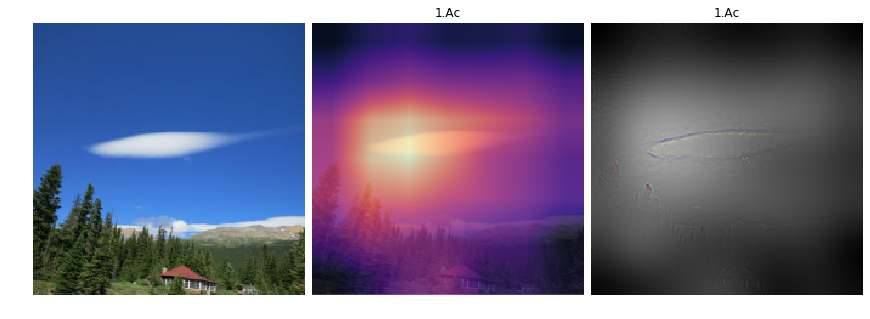

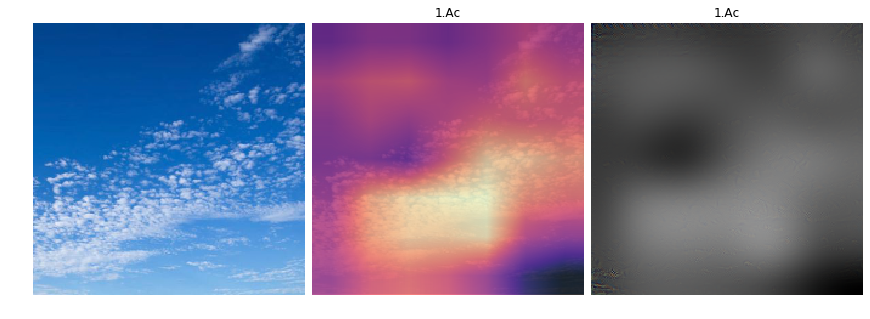

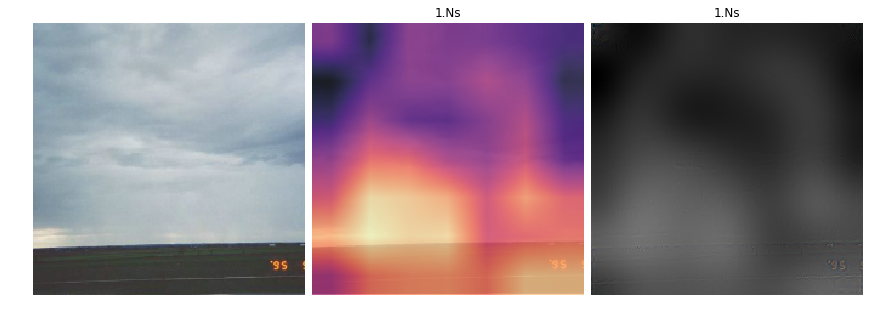

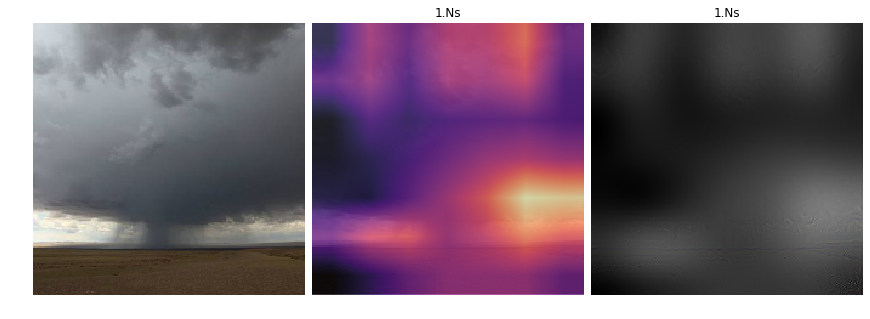

In [13]:
for idx in range(60,200,20):
    gcam = GradCam.from_interp(learn,interp,idx,include_label=True)
    gcam.plot()

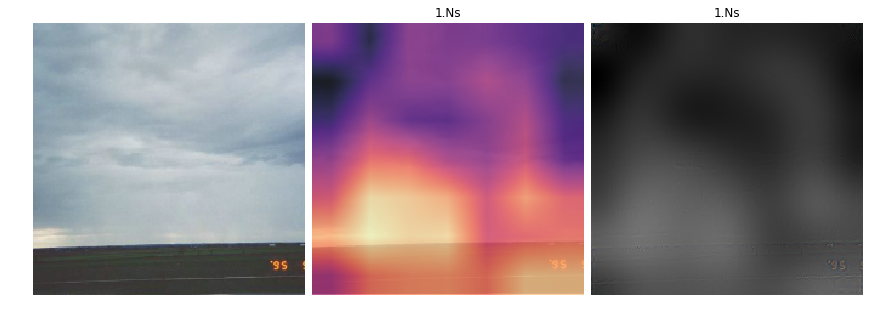

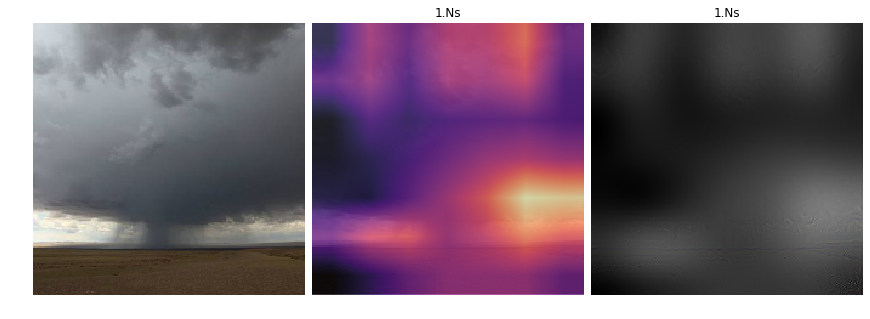

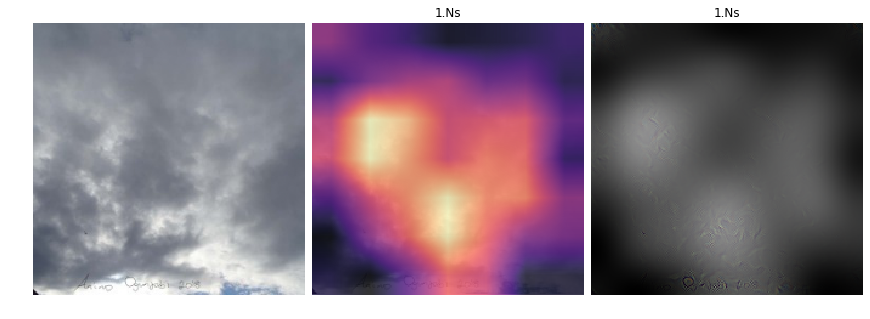

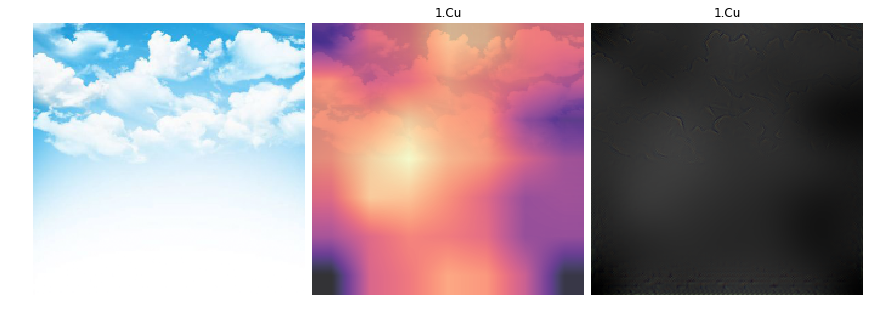

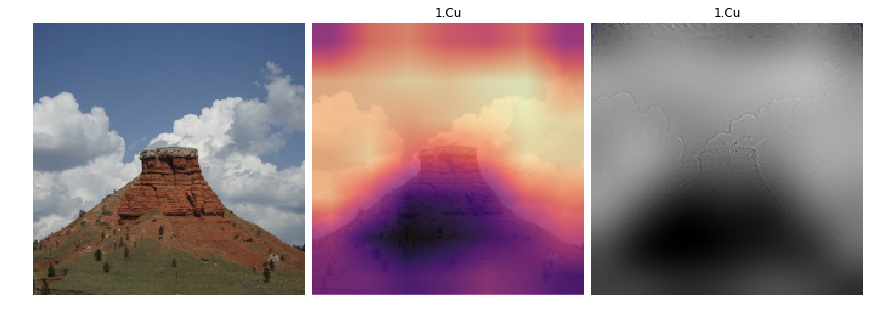

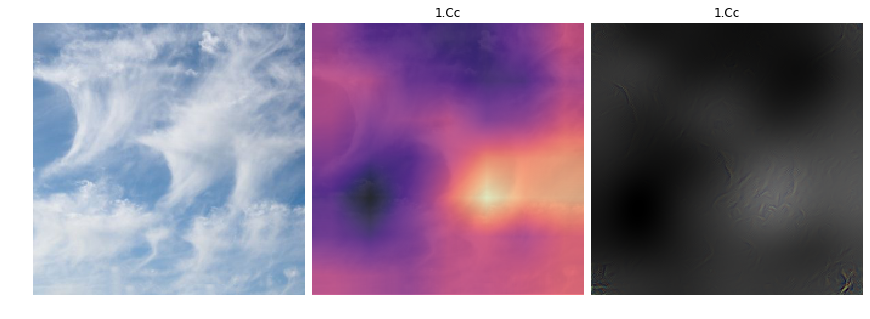

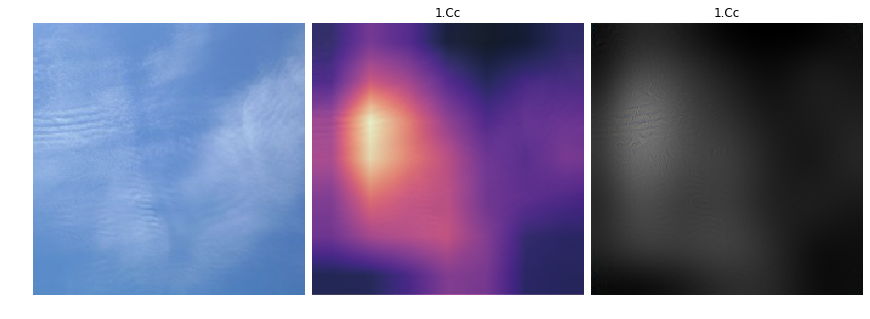

In [14]:
for idx in range(160,300,20):
    gcam = GradCam.from_interp(learn,interp,idx,include_label=True)
    gcam.plot()

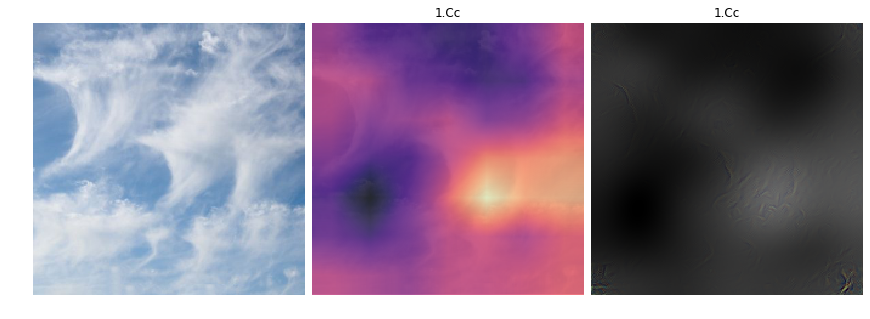

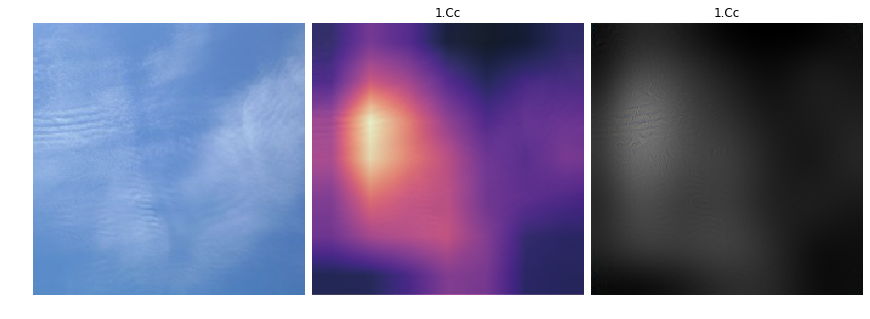

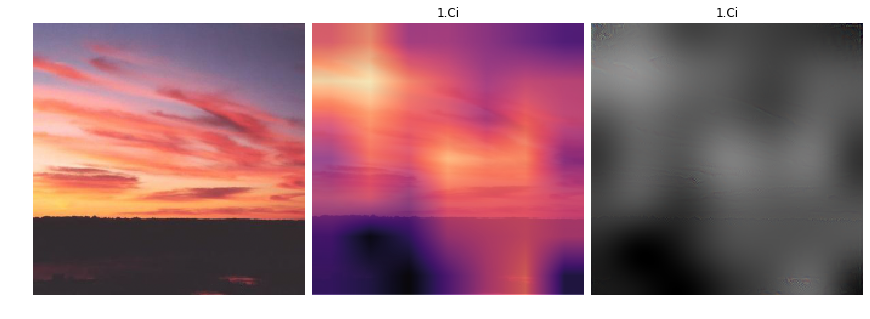

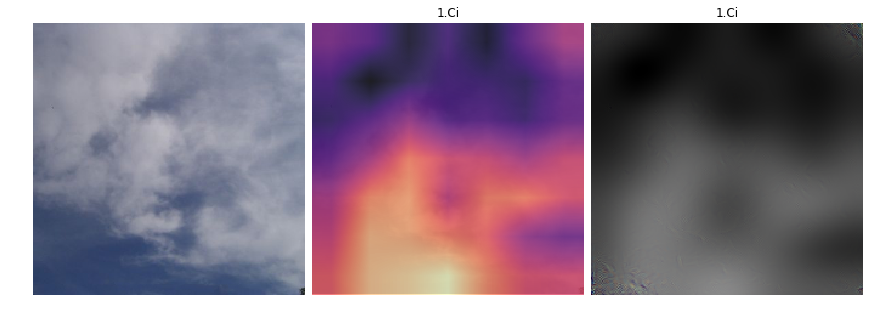

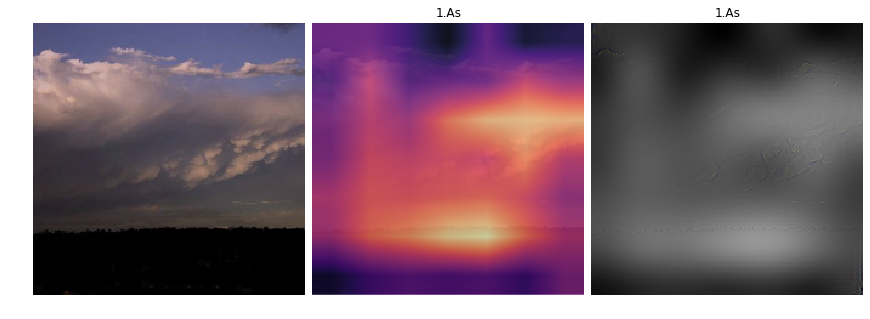

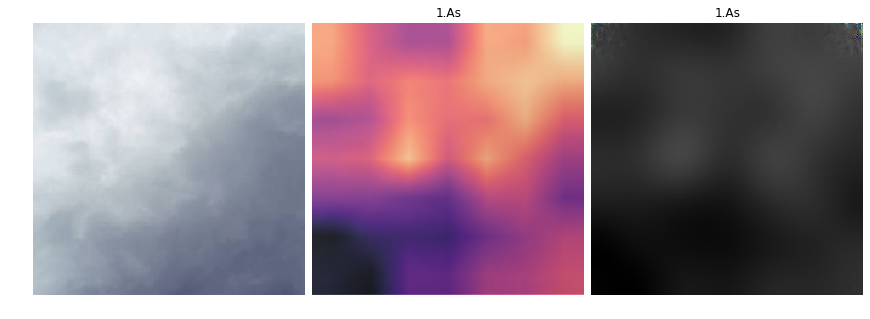

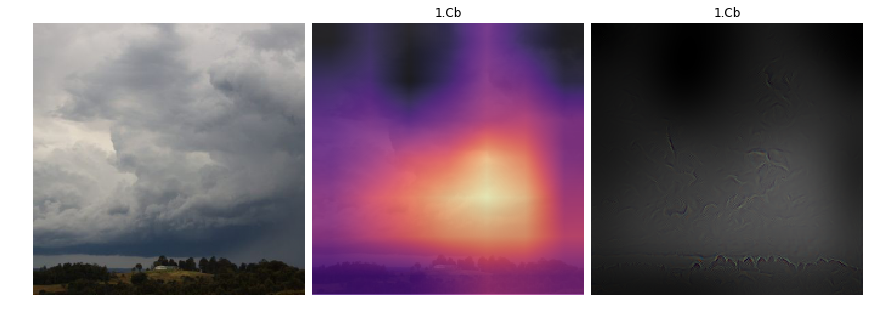

In [15]:
for idx in range(260,400,20):
    gcam = GradCam.from_interp(learn,interp,idx,include_label=True)
    gcam.plot()

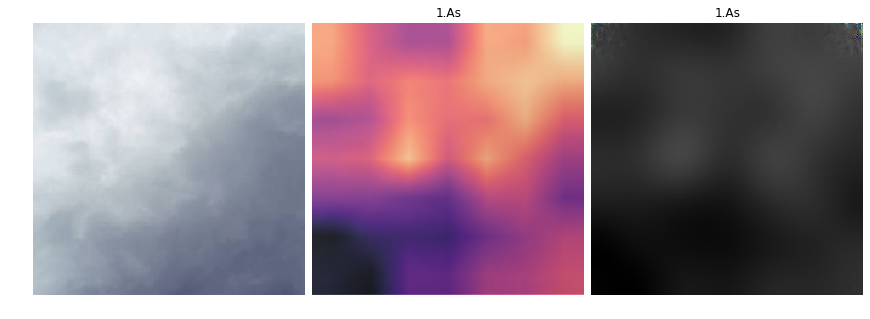

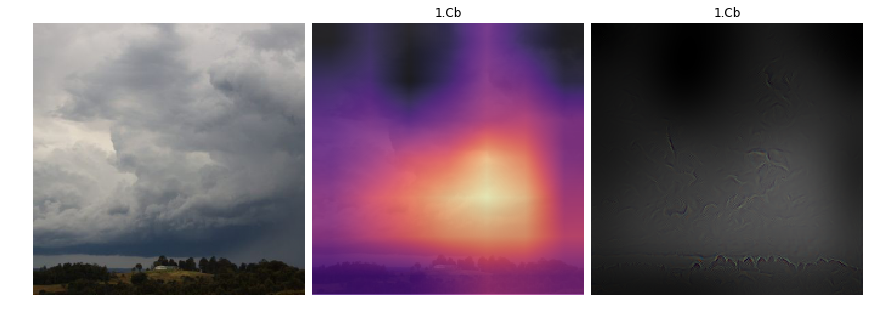

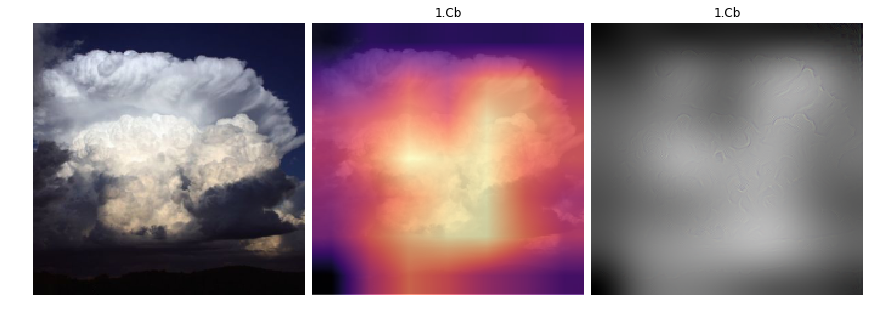

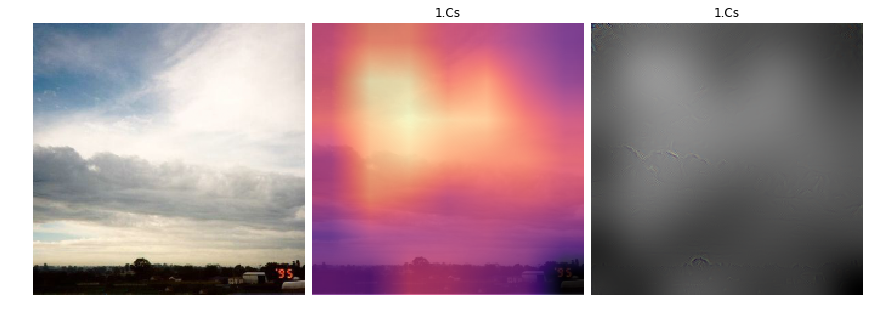

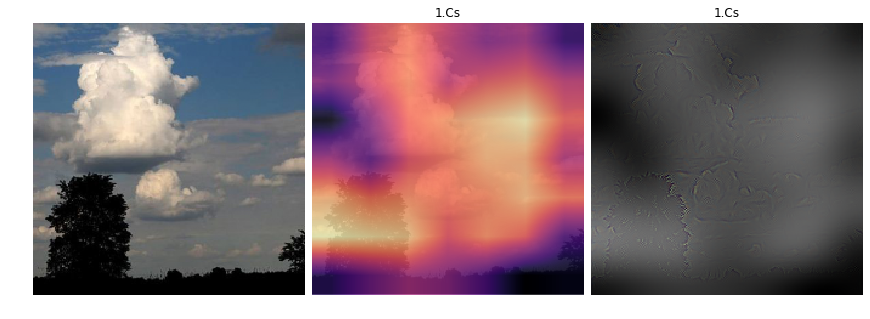

In [17]:
for idx in range(360,460,20):
    gcam = GradCam.from_interp(learn,interp,idx,include_label=True)
    gcam.plot()